In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
df = pd.read_csv('Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.shape

(300153, 12)

In [ ]:
df.drop('Unnamed: 0',axis='columns',inplace=True)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.airline.unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [ ]:
df.airline.value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [ ]:
df.flight.value_counts()

,count
flight,
UK-706,3235
UK-772,2741
UK-720,2650
UK-836,2542
UK-822,2468
...,...
SG-9923,1
6E-6474,1
6E-865,1


In [ ]:
df.drop('flight',axis='columns',inplace=True)
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.source_city.value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [ ]:
df.departure_time.value_counts()

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


In [ ]:
df.stops.value_counts()

,count
stops,
one,250863
zero,36004
two_or_more,13286


In [ ]:
df.arrival_time.value_counts()

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


In [ ]:
df.destination_city.value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


In [ ]:
df.rename(columns={'class':'Class'},inplace=True)
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,Class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.Class.value_counts()

,count
Class,
Economy,206666
Business,93487


In [ ]:
df=df[~(df.Class=='Bu')]

In [ ]:
df.Class.value_counts()

,count
Class,
Economy,206666
Business,93487


In [ ]:
df.duration.describe()

,duration
count,300153.000000
mean,12.221021
std,7.191997
min,0.830000
25%,6.830000
50%,11.250000
75%,16.170000
max,49.830000


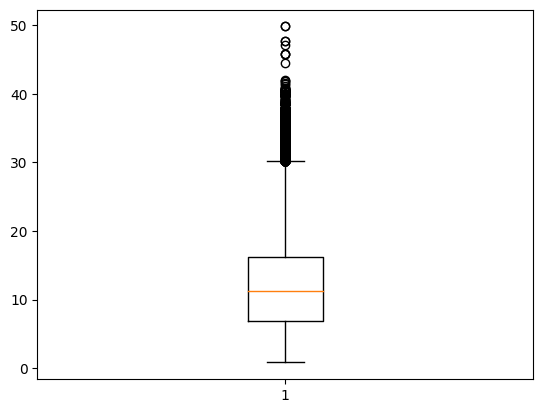

In [ ]:
plt.boxplot(df.duration)
plt.show()

In [ ]:
max_threshold=df.duration.quantile(0.98)
max_threshold

27.5

In [ ]:
df.duration.quantile(0.01)

1.33

In [ ]:
df[df.duration>max_threshold]

,airline,source_city,departure_time,stops,arrival_time,destination_city,Class,duration,days_left,price
65,Vistara,Delhi,Evening,one,Night,Mumbai,Economy,28.17,1,14093
66,Vistara,Delhi,Evening,one,Night,Mumbai,Economy,28.25,1,14093
82,Air_India,Delhi,Evening,one,Night,Mumbai,Economy,29.33,1,16245
114,Air_India,Delhi,Morning,one,Afternoon,Mumbai,Economy,30.08,1,24540
221,Vistara,Delhi,Evening,one,Night,Mumbai,Economy,28.25,2,15353
...,...,...,...,...,...,...,...,...,...,...
298024,Air_India,Chennai,Early_Morning,one,Afternoon,Kolkata,Business,29.83,49,54481
298036,Vistara,Chennai,Afternoon,one,Evening,Kolkata,Business,28.42,49,54896
298055,Air_India,Chennai,Morning,one,Afternoon,Kolkata,Business,28.58,49,55377
298080,Air_India,Chennai,Early_Morning,one,Morning,Hyderabad,Business,28.33,2,61971


In [ ]:
df=df[df.duration<=max_threshold]
df.shape

(294199, 10)

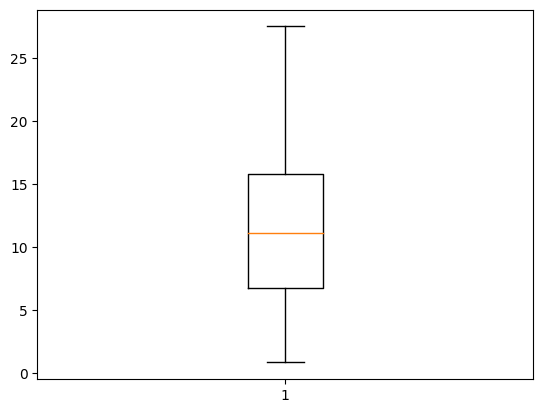

In [ ]:
plt.boxplot(df.duration)
plt.show()

In [ ]:
df.days_left.describe()

,days_left
count,294199.000000
mean,26.066778
std,13.533953
min,1.000000
25%,15.000000
50%,26.000000
75%,38.000000
max,49.000000


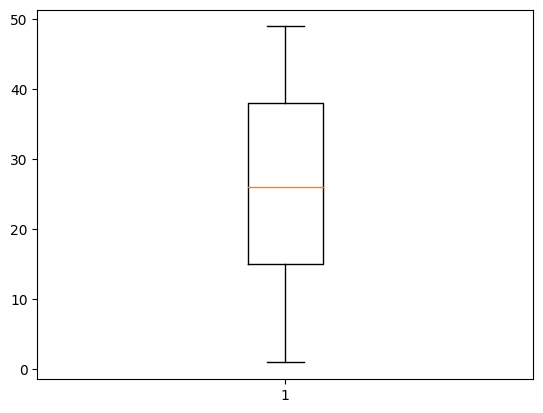

In [ ]:
plt.boxplot(df.days_left)
plt.show()

In [ ]:
df.price.describe()

,price
count,294199.000000
mean,20894.124847
std,22755.958743
min,1105.000000
25%,4755.000000
50%,7412.000000
75%,42521.000000
max,123071.000000


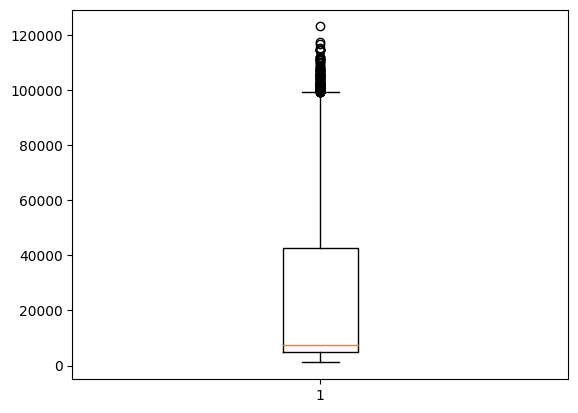

In [ ]:
plt.boxplot(df.price)
plt.show()

In [ ]:
df.price.quantile(0.95)

63277.0

In [ ]:
from scipy.stats import zscore

In [ ]:
z_score = zscore(df.price)
z_score[:5]

,price
0,-0.656582
1,-0.656582
2,-0.656450
3,-0.656494
4,-0.656494


In [ ]:
df[(z_score>3)|(z_score<-3)]

,airline,source_city,departure_time,stops,arrival_time,destination_city,Class,duration,days_left,price
206787,Vistara,Delhi,Evening,one,Night,Mumbai,Business,26.83,2,95657
206878,Vistara,Delhi,Afternoon,one,Night,Mumbai,Business,7.58,3,91575
210742,Vistara,Delhi,Early_Morning,one,Afternoon,Mumbai,Business,6.50,38,90281
210743,Vistara,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,38,90281
215854,Vistara,Delhi,Evening,one,Morning,Kolkata,Business,13.83,1,90057
...,...,...,...,...,...,...,...,...,...,...
299018,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.17,25,89537
299407,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,33,89537
299458,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.17,34,89537
299700,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,39,89537


In [ ]:
df = df[(z_score<3)&(z_score>-3)]
df.shape

(293614, 10)

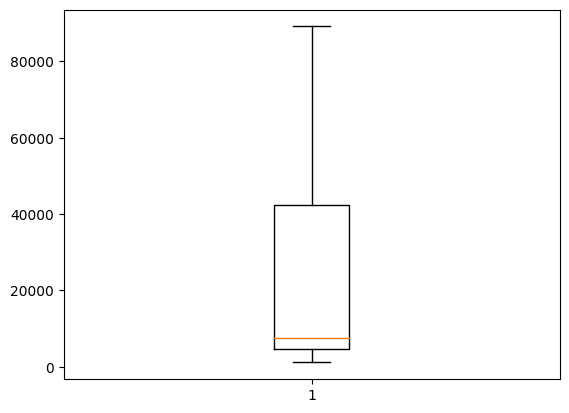

In [ ]:
plt.boxplot(df.price)
plt.show()

In [ ]:
df.shape

(293614, 10)

In [ ]:
df.isna().sum()

,0
airline,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
Class,0
duration,0
days_left,0
price,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293614 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           293614 non-null  object 
 1   source_city       293614 non-null  object 
 2   departure_time    293614 non-null  object 
 3   stops             293614 non-null  object 
 4   arrival_time      293614 non-null  object 
 5   destination_city  293614 non-null  object 
 6   Class             293614 non-null  object 
 7   duration          293614 non-null  float64
 8   days_left         293614 non-null  int64  
 9   price             293614 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 24.6+ MB


In [ ]:
airline = pd.get_dummies(df.airline,drop_first=True,dtype=int,prefix='airline')
df = pd.concat([df,airline],axis='columns')
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,Class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0,0,0,1,0
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0,0,0,1,0
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,0,0,0,0,0
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,0,0,0,0,1
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,0,0,0,0,1


In [ ]:
sc = pd.get_dummies(df.source_city,drop_first=True,dtype=int,prefix='sourceCity')
df = pd.concat([df,sc],axis='columns')
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,Class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,sourceCity_Chennai,sourceCity_Delhi,sourceCity_Hyderabad,sourceCity_Kolkata,sourceCity_Mumbai
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0,0,0,1,0,0,1,0,0,0
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0,0,0,1,0,0,1,0,0,0
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,0,0,0,0,0,0,1,0,0,0
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,0,0,0,0,1,0,1,0,0,0
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,0,0,0,0,1,0,1,0,0,0


In [ ]:
dt = pd.get_dummies(df.departure_time,drop_first=True,dtype=int,prefix='dept_time')
df = pd.concat([df,dt],axis='columns')
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,Class,duration,days_left,price,...,sourceCity_Chennai,sourceCity_Delhi,sourceCity_Hyderabad,sourceCity_Kolkata,sourceCity_Mumbai,dept_time_Early_Morning,dept_time_Evening,dept_time_Late_Night,dept_time_Morning,dept_time_Night
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,...,0,1,0,0,0,0,1,0,0,0
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,...,0,1,0,0,0,1,0,0,0,0
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,...,0,1,0,0,0,1,0,0,0,0
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,...,0,1,0,0,0,0,0,0,1,0
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
stops = pd.get_dummies(df.stops,drop_first=True,dtype=int,prefix='stop')
df = pd.concat([df,stops],axis='columns')
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,Class,duration,days_left,price,...,sourceCity_Hyderabad,sourceCity_Kolkata,sourceCity_Mumbai,dept_time_Early_Morning,dept_time_Evening,dept_time_Late_Night,dept_time_Morning,dept_time_Night,stop_two_or_more,stop_zero
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,...,0,0,0,0,1,0,0,0,0,1
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,...,0,0,0,1,0,0,0,0,0,1
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,...,0,0,0,1,0,0,0,0,0,1
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,...,0,0,0,0,0,0,1,0,0,1
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
at = pd.get_dummies(df.arrival_time,drop_first=True,dtype=int,prefix='arr_time')
df = pd.concat([df,at],axis='columns')
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,Class,duration,days_left,price,...,dept_time_Late_Night,dept_time_Morning,dept_time_Night,stop_two_or_more,stop_zero,arr_time_Early_Morning,arr_time_Evening,arr_time_Late_Night,arr_time_Morning,arr_time_Night
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,...,0,0,0,0,1,0,0,0,0,1
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,...,0,0,0,0,1,0,0,0,1,0
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,...,0,0,0,0,1,1,0,0,0,0
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,...,0,1,0,0,1,0,0,0,0,0
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,...,0,1,0,0,1,0,0,0,1,0


In [ ]:
dc = pd.get_dummies(df.destination_city,drop_first=True,dtype=int,prefix='dest_city')
df = pd.concat([df,dc],axis='columns')
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,Class,duration,days_left,price,...,arr_time_Early_Morning,arr_time_Evening,arr_time_Late_Night,arr_time_Morning,arr_time_Night,dest_city_Chennai,dest_city_Delhi,dest_city_Hyderabad,dest_city_Kolkata,dest_city_Mumbai
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,...,0,0,0,0,1,0,0,0,0,1
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,...,0,0,0,1,0,0,0,0,0,1
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,...,1,0,0,0,0,0,0,0,0,1
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,...,0,0,0,0,0,0,0,0,0,1
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
df.Class.replace({'Economy':0,'Business':1},inplace=True)
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,Class,duration,days_left,price,...,arr_time_Early_Morning,arr_time_Evening,arr_time_Late_Night,arr_time_Morning,arr_time_Night,dest_city_Chennai,dest_city_Delhi,dest_city_Hyderabad,dest_city_Kolkata,dest_city_Mumbai
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,0,2.17,1,5953,...,0,0,0,0,1,0,0,0,0,1
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,0,2.33,1,5953,...,0,0,0,1,0,0,0,0,0,1
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,0,2.17,1,5956,...,1,0,0,0,0,0,0,0,0,1
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,0,2.25,1,5955,...,0,0,0,0,0,0,0,0,0,1
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,0,2.33,1,5955,...,0,0,0,1,0,0,0,0,0,1


Economy --> 0
Business --> 1

In [ ]:
df.Class.value_counts()

,count
Class,
0,202193
1,91421


In [ ]:
df.drop(['airline','source_city','departure_time','stops','arrival_time','destination_city'],axis='columns',inplace=True)
df.head()

,Class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,sourceCity_Chennai,...,arr_time_Early_Morning,arr_time_Evening,arr_time_Late_Night,arr_time_Morning,arr_time_Night,dest_city_Chennai,dest_city_Delhi,dest_city_Hyderabad,dest_city_Kolkata,dest_city_Mumbai
0,0,2.17,1,5953,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,2.33,1,5953,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,2.17,1,5956,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,2.25,1,5955,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,2.33,1,5955,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
new_df = df.sample(10000)
new_df.shape

(10000, 31)

In [ ]:
new_df.describe()

,Class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,sourceCity_Chennai,...,arr_time_Early_Morning,arr_time_Evening,arr_time_Late_Night,arr_time_Morning,arr_time_Night,dest_city_Chennai,dest_city_Delhi,dest_city_Hyderabad,dest_city_Kolkata,dest_city_Mumbai
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.313300,11.787282,26.182000,20742.951500,0.255300,0.07850,0.145500,0.031900,0.42950,0.131200,...,0.05130,0.252900,0.049900,0.216000,0.303100,0.132300,0.190200,0.139300,0.165000,0.202500
std,0.463858,6.777634,13.531792,22507.407673,0.436052,0.26897,0.352622,0.175743,0.49503,0.337636,...,0.22062,0.434696,0.217749,0.411535,0.459621,0.338834,0.392478,0.346277,0.371199,0.401883
min,0.000000,0.830000,1.000000,1105.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.580000,15.000000,4674.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,11.080000,26.000000,7412.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,15.830000,38.000000,42457.000000,1.000000,0.00000,0.000000,0.000000,1.00000,0.000000,...,0.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,27.500000,49.000000,88950.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x = new_df.drop('price',axis='columns')
y = new_df.price
x.head()

,Class,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,sourceCity_Chennai,sourceCity_Delhi,...,arr_time_Early_Morning,arr_time_Evening,arr_time_Late_Night,arr_time_Morning,arr_time_Night,dest_city_Chennai,dest_city_Delhi,dest_city_Hyderabad,dest_city_Kolkata,dest_city_Mumbai
12989,0,24.50,17,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
77215,0,9.42,49,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
242217,1,16.92,12,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
142221,0,2.58,48,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
258870,1,14.25,48,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
pd.set_option('display.max_columns',None)
df.head()

,Class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,sourceCity_Chennai,sourceCity_Delhi,sourceCity_Hyderabad,sourceCity_Kolkata,sourceCity_Mumbai,dept_time_Early_Morning,dept_time_Evening,dept_time_Late_Night,dept_time_Morning,dept_time_Night,stop_two_or_more,stop_zero,arr_time_Early_Morning,arr_time_Evening,arr_time_Late_Night,arr_time_Morning,arr_time_Night,dest_city_Chennai,dest_city_Delhi,dest_city_Hyderabad,dest_city_Kolkata,dest_city_Mumbai
0,0,2.17,1,5953,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,0,2.33,1,5953,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,0,2.17,1,5956,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
3,0,2.25,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,2.33,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1


In [ ]:
y.head()

,price
12989,4230
77215,4099
242217,57554
142221,3862
258870,37985


In [ ]:
cols=x.columns.tolist()
cols

['Class',
 'duration',
 'days_left',
 'airline_Air_India',
 'airline_GO_FIRST',
 'airline_Indigo',
 'airline_SpiceJet',
 'airline_Vistara',
 'sourceCity_Chennai',
 'sourceCity_Delhi',
 'sourceCity_Hyderabad',
 'sourceCity_Kolkata',
 'sourceCity_Mumbai',
 'dept_time_Early_Morning',
 'dept_time_Evening',
 'dept_time_Late_Night',
 'dept_time_Morning',
 'dept_time_Night',
 'stop_two_or_more',
 'stop_zero',
 'arr_time_Early_Morning',
 'arr_time_Evening',
 'arr_time_Late_Night',
 'arr_time_Morning',
 'arr_time_Night',
 'dest_city_Chennai',
 'dest_city_Delhi',
 'dest_city_Hyderabad',
 'dest_city_Kolkata',
 'dest_city_Mumbai']

In [ ]:
import json
with open('flight_columns.json','w') as f:
  json.dump({'data_columns':cols},f)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)
x_train.shape,x_test.shape

((8000, 30), (2000, 30))

In [ ]:
score = cross_val_score(LinearRegression(),x,y,cv=5)
score

array([0.91690206, 0.91906718, 0.91966734, 0.91474197, 0.9197726 ])

In [ ]:
score = cross_val_score(DecisionTreeRegressor(),x,y,cv=5)
score

array([0.94846684, 0.9451894 , 0.94210756, 0.9447298 , 0.93884067])

In [ ]:
score = cross_val_score(RandomForestRegressor(),x,y,cv=5)
score

array([0.96662222, 0.96627924, 0.96898896, 0.96839874, 0.96864649])

In [ ]:
score = cross_val_score(SVR(),x,y,cv=5)
score

array([-0.33179526, -0.37415432, -0.37784005, -0.35036654, -0.36426133])

In [ ]:
model = RandomForestRegressor(n_estimators=100,max_depth=20)

In [ ]:
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=20)

In [ ]:
model.score(x_train,y_train)

0.9947251495896462

In [ ]:
model.score(x_test,y_test)

0.9680745225091214

## Saving the model

In [ ]:
import joblib

In [ ]:
joblib.dump(model,'flight_price_prediction_model.joblib')

['flight_price_prediction_model.joblib']